# 1. Understand the data


[Preprocess data in Excel](Preprodata.xlsx)

# Reference:
Thank to the grest resource   
1.[Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)  
2.[Stacked Regressions to predict House Prices](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)  
to help me discover new world of data science

## Import all libraries we need first

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Use the buildin function to know the basic of data

In [3]:
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [4]:
test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 80 entries, Id to SaleCondition
dtypes: float64(11), int64(26), object(43)
memory usage: 912.0+ KB


In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

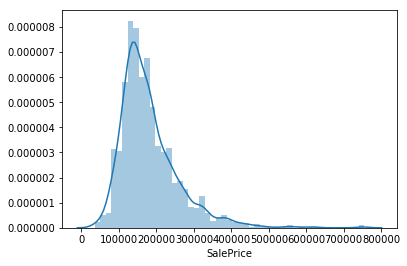

In [6]:
sns.distplot(train['SalePrice'])

In [7]:
print('Skewness:',train['SalePrice'].skew())
print('Kurtosis:',train['SalePrice'].kurtosis()) #-> it's positive skewness

Skewness: 1.88287575977
Kurtosis: 6.53628186006


### 1st feature LotArea 

In [8]:
def draw_relation(data,column):
    new_data = pd.concat([data[column],data['SalePrice']],axis=1)
    new_data.plot.scatter(x = column, y = 'SalePrice',ylim = (0,800000))

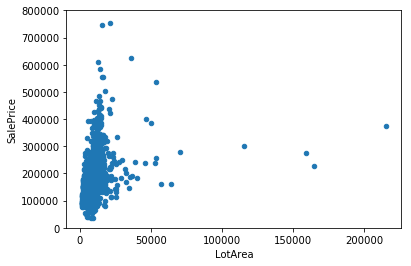

In [9]:
draw_relation(train,'LotArea')

### 2nd Feature YearBuilt (chose by hand)

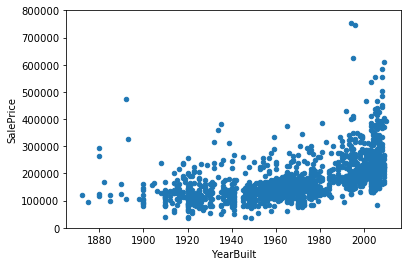

In [10]:
draw_relation(train,'YearBuilt')

### 3rd feature GrLivArea
## Great linear 

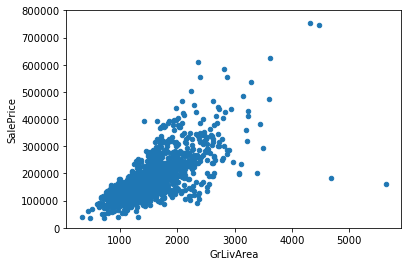

In [11]:
draw_relation(train,'GrLivArea')

### 4th feature TotRmsAbvGrd

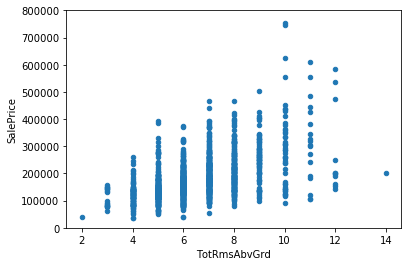

In [12]:
draw_relation(train,'TotRmsAbvGrd')

### 5th feature YrSold

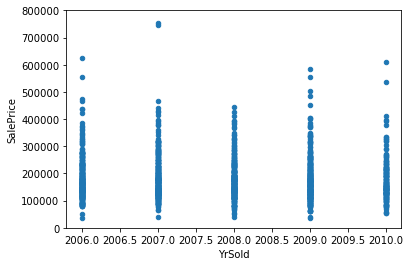

In [13]:
draw_relation(train,'YrSold')

### 6th feature OverallQual

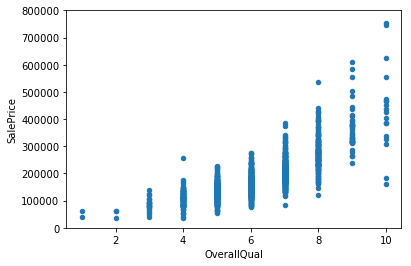

In [14]:
draw_relation(train,'OverallQual')

### 7th feature OverallCond

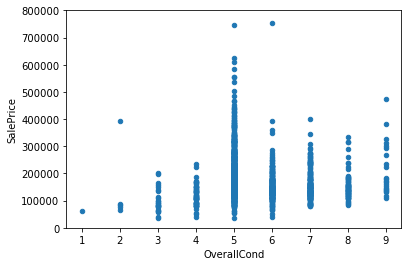

In [15]:
draw_relation(train,'OverallCond')

# Use the function corr to make a Correlation matrix
It's could help us to filter out the high correlation (contain similar info)  
and help us to understand which field are highly related to saleprice

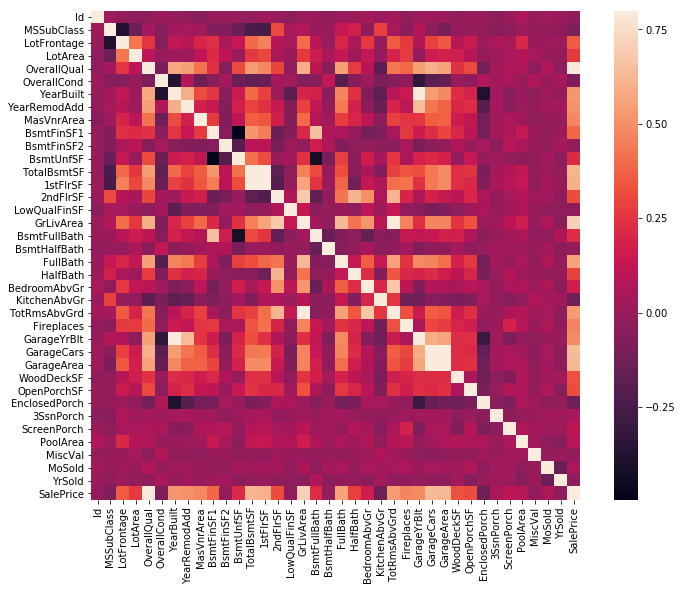

In [16]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

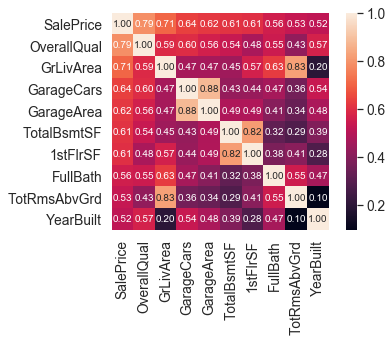

In [17]:
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T) # transpose becuase corrcoefs are computed by rows
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,annot=True,fmt='.2f',square=True,annot_kws={'size':10},xticklabels=cols.values,yticklabels=cols.values)

#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

GrLivArea and TotRmsAbvGrd are highly related   
GarageCars and GarageArea are highly related  
TotalBsmtSF 1stFlrSF are highly related

In [18]:
newcols = [col for col in list(cols.values) if col not in['TotRmsAbvGrd','GarageArea','1stFlrSF']]

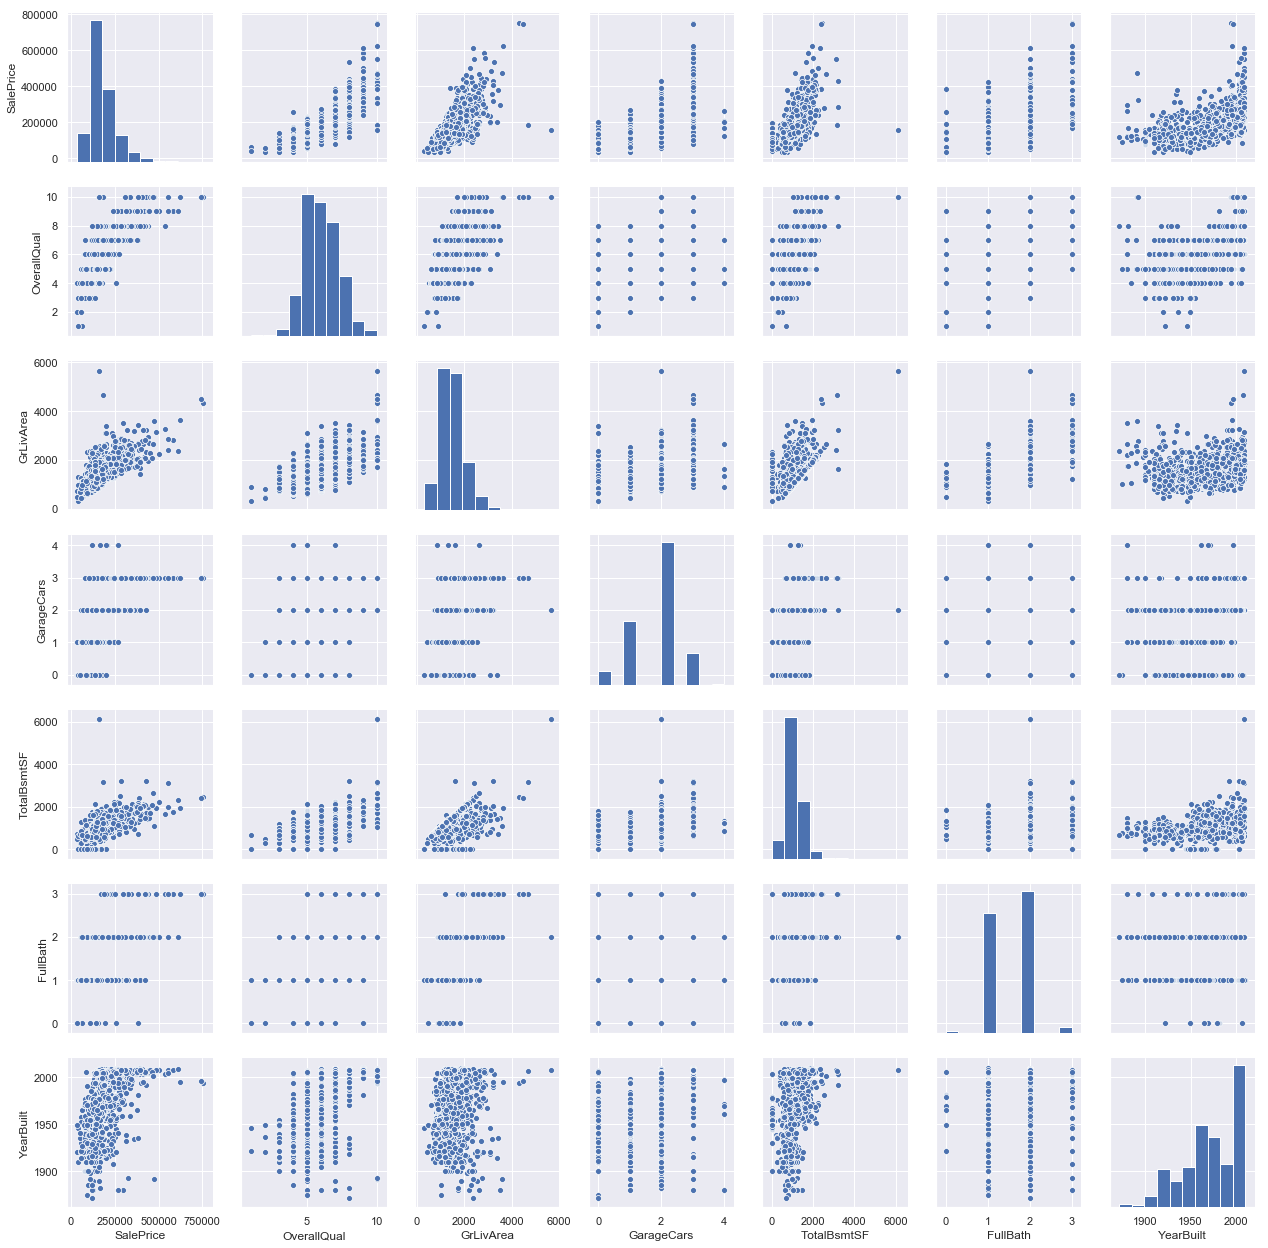

In [19]:
sns.set()
sns.pairplot(train[newcols])

# 2.Missing Value
We could set a treshold to delete the row more than XX % missing value  
assume we use 20 %

In [20]:
newcols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']

In [21]:
miss_rate = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
miss_total = (train.isnull().sum()).sort_values(ascending = False)
miss_table = pd.concat([miss_total,miss_rate],axis=1,keys=['Total','Rate'])
miss_table.head(20)

,Total,Rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [22]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.drop(labels = miss_table[miss_table['Total']>1].index,axis=1)
# deal with the Electrical missing row
train = train.drop(labels = train[train['Electrical'].isnull()].index,axis=0)
# check whether there is any missing value in train set
train.isna().sum().max()

0

# 3.Outlier

In [23]:
sale_price_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
sorted(sale_price_scaled,reverse=True)[:10],sorted(sale_price_scaled,reverse=True)[-10:]

([array([ 7.22629831]),
  array([ 7.10041987]),
  array([ 5.58987866]),
  array([ 5.42191907]),
  array([ 5.06034585]),
  array([ 4.728631]),
  array([ 4.70872962]),
  array([ 4.49473628]),
  array([ 4.0395221]),
  array([ 3.82758058])],
 [array([-1.57269236]),
  array([-1.58519209]),
  array([-1.58519209]),
  array([-1.6166617]),
  array([-1.62295562]),
  array([-1.77400974]),
  array([-1.78282123]),
  array([-1.80044422]),
  array([-1.83303414]),
  array([-1.83820775])])

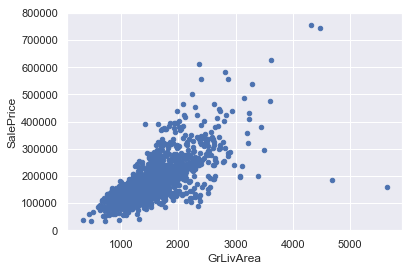

In [24]:
draw_relation(train,'GrLivArea')

Delete two outlier (large GrLivArea and low SalePrice)

In [25]:
out_lier_id = train['GrLivArea'].sort_values(ascending = False).index[0:2]
train = train.drop(labels=out_lier_id[0],axis=0)
train = train.drop(labels=out_lier_id[1],axis=0)

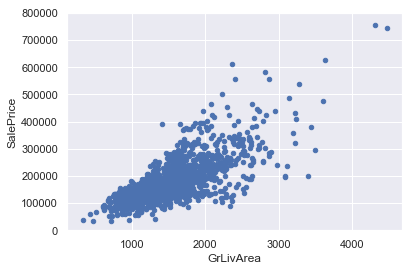

In [26]:
draw_relation(train,'GrLivArea')

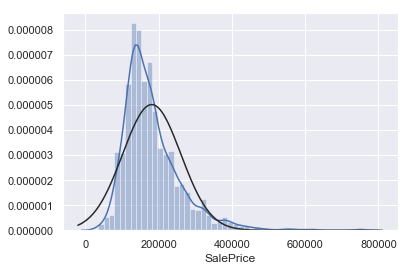

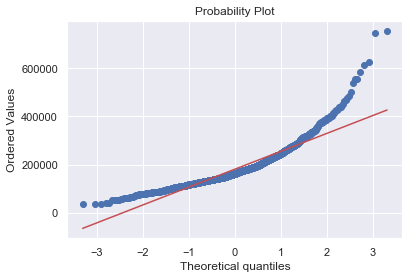

In [27]:
sns.distplot(train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)

In the above plot we could easily figure out that it's not normal distribution, it's a positive skewness, and in the statistics, we know that positive skweness could be transform to normal distribution by use log!!

## After log !

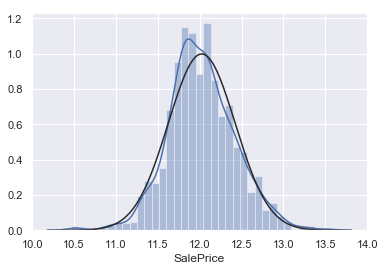

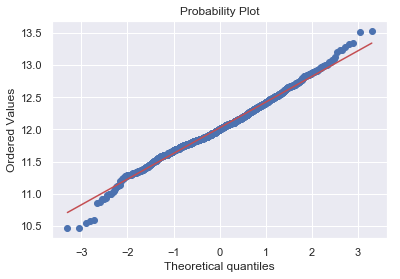

In [28]:
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)

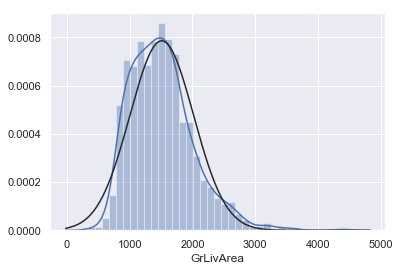

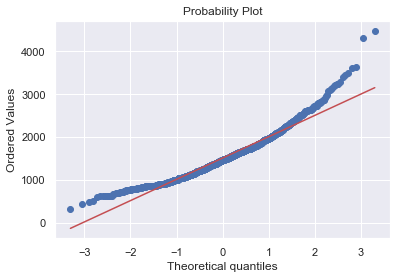

In [29]:
sns.distplot(train['GrLivArea'],fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'],plot=plt)

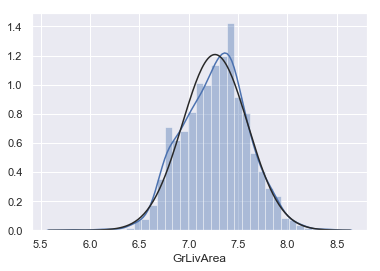

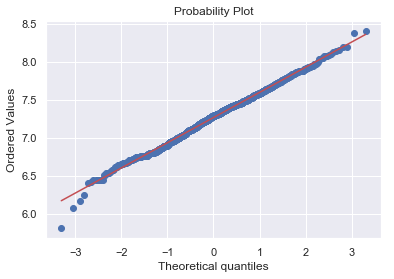

In [30]:
train['GrLivArea'] = np.log(train['GrLivArea'])
sns.distplot(train['GrLivArea'],fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'],plot=plt)

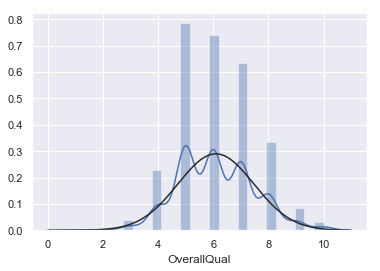

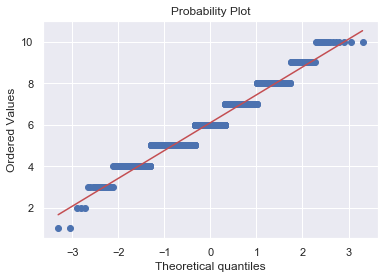

In [31]:
sns.distplot(train['OverallQual'],fit=norm)
fig = plt.figure()
res = stats.probplot(train['OverallQual'],plot=plt)

# After understanding of data, let's start to processing data!
# --------------------------------------------------------------------------------------------

In [32]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
trian_id = train['Id']
test_id = test['Id']

train = train.drop('Id',axis = 1)
test = test.drop('Id',axis = 1)

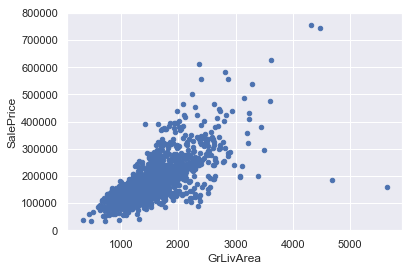

In [33]:
draw_relation(train,'GrLivArea')

## 1. Before process whole data (train + test), delete the outlier

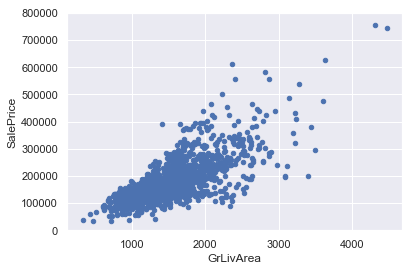

In [34]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice'] < 300000)].index)
draw_relation(train,'GrLivArea')

mu = 180932.92, sigma = 79467.79


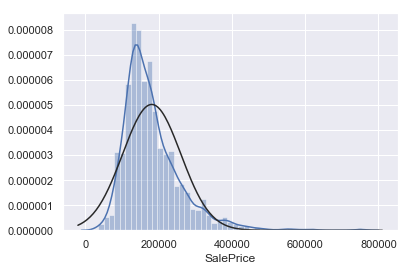

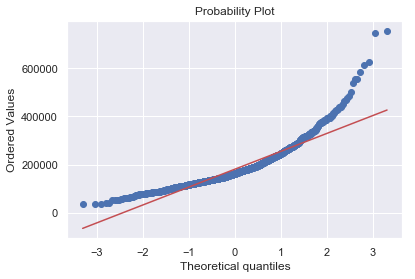

In [35]:
sns.distplot(train['SalePrice'],fit = norm)
mu,sigma = norm.fit(train['SalePrice'])
print("mu = {:.2f}, sigma = {:.2f}".format(mu,sigma))

fig = plt.figure()
stats_line = stats.probplot(train['SalePrice'],plot=plt)

# Convert the number which is not in normal distribution
The author in [Stacked Regressions to predict House Prices](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) provide a good way to do normal transform!!  
using np.log1p instead of using np.log to prevent the problem of log0

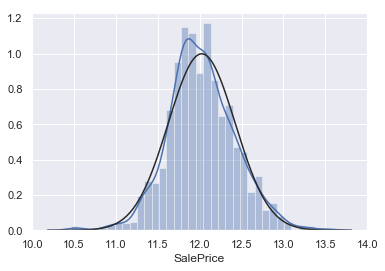

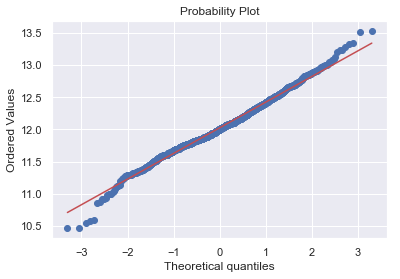

In [36]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)
fig = plt.figure()
stats_line = stats.probplot(train['SalePrice'],plot= plt)

# 2. Let's combine train and test data together and do the feature engineering

In [37]:
def list_current_miss_val():
    all_data_na = (all_data.isna().sum()/len(all_data)).sort_values(ascending = False)
    print(all_data_na.head(15))

In [38]:
train_len = len(train)
test_len = len(test)
y_train = train['SalePrice'].values
all_data = pd.concat((train,test)).reset_index(drop=True) # make sure that did not use the same index for different data
all_data = all_data.drop('SalePrice',axis=1)
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [39]:
all_data_na = (all_data.isna().sum()/len(all_data)).sort_values(ascending = False)
all_data_na.head(15)

PoolQC          0.996915
MiscFeature     0.964004
Alley           0.932122
Fence           0.804251
FireplaceQu     0.486802
LotFrontage     0.166610
GarageFinish    0.054508
GarageQual      0.054508
GarageYrBlt     0.054508
GarageCond      0.054508
GarageType      0.053822
BsmtCond        0.028111
BsmtExposure    0.028111
BsmtQual        0.027768
BsmtFinType2    0.027425
dtype: float64

## Missing Value 1: PoolQC
In the data description NA means none

In [40]:
all_data['PoolQC'].fillna('None',inplace = True)
all_data['PoolQC'].isna().sum()

0

## Missing Value 2: MiscFeature 
In the data description NA means none

In [41]:
all_data['MiscFeature'].fillna('None',inplace = True)
all_data['MiscFeature'].isna().sum()

0

## Missing Value 3: Alley 
In the data description NA means none

In [42]:
all_data['Alley'].fillna('None',inplace = True)
all_data['Alley'].isna().sum()

0

## Missing Value 4: Fence  
In the data description NA means none

In [43]:
all_data['Fence'].fillna('None',inplace = True)
all_data['Fence'].isna().sum()

0

## Missing Value 5: FireplaceQu 
In the data description NA means none

In [44]:
all_data['FireplaceQu'].fillna('None',inplace = True)
all_data['FireplaceQu'].isna().sum()

0

## Missing Value 6: LotFrontage 
Sice the Lot Front age could be similar with the neighbor, we could fill the LotFrontage with the median of its neighbor

In [45]:
print(all_data["LotFrontage"].head(5))

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64


In [46]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
all_data['LotFrontage'].isna().sum()

0

In [47]:
print(all_data["LotFrontage"].head(5))

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64


## Missing Value 7: GarageFinish, GarageQual, GarageType,GarageCond   
In the data description NA means none

In [48]:
for col in ['GarageFinish', 'GarageQual', 'GarageType','GarageCond']:
    all_data[col].fillna('none',inplace = True)
    print(all_data[col].isna().sum())

0
0
0
0


# Missing Value 8: GarageYrBlt, GarageCars, GarageArea
In the data na means no, and the datatype is catagorical

In [49]:
for col in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    all_data[col].fillna(0,inplace = True)
    print(all_data[col].isna().sum())

0
0
0


# Missing Value 9:BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1, BsmtFinType2 (catagorical): 
in the data na means no basement

In [50]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']:
    all_data[col].fillna('None',inplace = True)
    print(all_data[col].isna().sum())

0
0
0
0
0


# Missing value 10: BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath (numerical):

In [51]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    all_data[col].fillna(0,inplace = True)
    print(all_data[col].isna().sum())

0
0
0
0
0
0


# Missing value 11: MasVnrType(catagorical) and MasVnrArea(numerical)

In [52]:
all_data['MasVnrType'].fillna('None', inplace = True)
all_data['MasVnrArea'].fillna(0,inplace = True)
print(all_data['MasVnrType'].isna().sum())
print(all_data['MasVnrArea'].isna().sum())

0
0


# Missing value 12:MSZoning, use Counter to figure out that most of data is RL

In [53]:
from collections import Counter
Counter(all_data['MSZoning'])

Counter({'RL': 2263, 'RM': 460, 'C (all)': 25, 'FV': 139, 'RH': 26, nan: 4})

In [54]:
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace = True)
print(all_data['MSZoning'].isna().sum())

0


# Missing value 13: Functional, in the data description, it says the na is 'Typ'

In [55]:
all_data['Functional'].fillna('Typ',inplace = True)
print(all_data['Functional'].isna().sum())

0


# Missing value 14: Utilities
Since most of the value is AllPub, and the NoSeWa only appear in Train set, and it would not help to predict the data, so remove the column

In [56]:
from collections import Counter
Counter(all_data['Utilities'])

Counter({'AllPub': 2914, 'NoSeWa': 1, nan: 2})

In [57]:
all_data[all_data['Utilities'] == 'NoSeWa']

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
943,1344,0,0,None,3,1Fam,TA,No,111.0,354.0,...,COD,233,Pave,7,819.0,NoSeWa,0,1958,1958,2009


In [58]:
all_data.drop(['Utilities'],axis=1,inplace=True)

# Missing value 15: Exterior1st, Exterior2nd
with only one row miss the value, and it seems have predominantly value 'VinylSd'

In [59]:
from collections import Counter
print(Counter(all_data['Exterior1st']))
print(Counter(all_data['Exterior2nd']))

Counter({'VinylSd': 1025, 'MetalSd': 450, 'HdBoard': 442, 'Wd Sdng': 411, 'Plywood': 221, 'CemntBd': 125, 'BrkFace': 87, 'WdShing': 56, 'AsbShng': 44, 'Stucco': 42, 'BrkComm': 6, 'AsphShn': 2, 'Stone': 2, 'CBlock': 2, 'ImStucc': 1, nan: 1})
Counter({'VinylSd': 1014, 'MetalSd': 447, 'HdBoard': 406, 'Wd Sdng': 391, 'Plywood': 270, 'CmentBd': 125, 'Wd Shng': 81, 'BrkFace': 47, 'Stucco': 46, 'AsbShng': 38, 'Brk Cmn': 22, 'ImStucc': 15, 'Stone': 6, 'AsphShn': 4, 'CBlock': 3, 'Other': 1, nan: 1})


In [60]:
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0],inplace = True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0],inplace = True)
print(all_data['Exterior1st'].isna().sum())
print(all_data['Exterior2nd'].isna().sum())

0
0


# Missing value 16: KitchenQual
only one missing value and used mode would be safe

In [61]:
from collections import Counter
Counter(all_data['KitchenQual'])

Counter({'Gd': 1151, 'TA': 1492, 'Ex': 203, 'Fa': 70, nan: 1})

In [62]:
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0],inplace = True)
all_data['KitchenQual'].isna().sum()

0

# Missing value 17: Electrical
only one missing value and used mode would be safe

In [63]:
from collections import Counter
Counter(all_data['Electrical'])

Counter({'SBrkr': 2669,
         'FuseF': 50,
         'FuseA': 188,
         'FuseP': 8,
         'Mix': 1,
         nan: 1})

In [64]:
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0],inplace = True)
all_data['Electrical'].isna().sum()

0

# Missing value 18: SaleType
only one missing value and used mode would be safe

In [65]:
from collections import Counter
Counter(all_data['SaleType'])

Counter({'WD': 2525,
         'New': 237,
         'COD': 87,
         'ConLD': 26,
         'ConLI': 9,
         'CWD': 12,
         'ConLw': 8,
         'Con': 5,
         'Oth': 7,
         nan: 1})

In [66]:
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0],inplace = True)
all_data['SaleType'].isna().sum()

0

In [67]:
all_data.isna().sum().sum()

0

# -------------------------------------------------------------------------------------------
Ya!!! No more missing Value

In [68]:
all_data['MSSubClass'].head(5)

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

# When we preprocess data, we should mark the data which are catagorical but represent in number :MSSubClass,OverallCond,YrSold,MoSold

In [69]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [70]:
all_data['MSSubClass'].head(5)

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: object

# Some value's order is a matter, so we need to use label encoder to the value

In [71]:
all_data['BsmtCond'].head(5)

0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object

In [72]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for col in cols:
    le = LabelEncoder() 
    le.fit(list(all_data[col].values)) 
    all_data[col] = le.transform(list(all_data[col].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [73]:
all_data['BsmtCond'].head(5)

0    4
1    4
2    4
3    1
4    4
Name: BsmtCond, dtype: int64

# Since the area is a important factor to the sales price

In [74]:
# Adding total sqfootage feature 
from scipy.stats import skew
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [75]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


mu = 43.55, sigma = 496.29


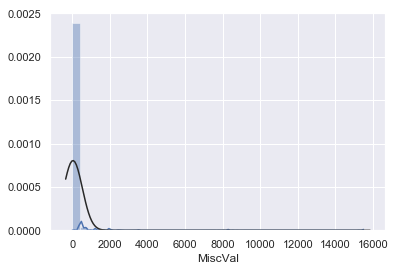

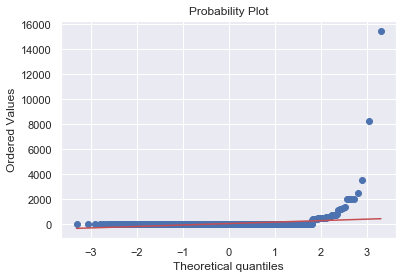

In [76]:
sns.distplot(train['MiscVal'],fit = norm)
mu,sigma = norm.fit(train['MiscVal'])
print("mu = {:.2f}, sigma = {:.2f}".format(mu,sigma))

fig = plt.figure()
stats_line = stats.probplot(train['MiscVal'],plot=plt)

## Box Cox Transformation of (highly) skewed features

In [77]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [78]:
all_data = pd.get_dummies(all_data)

In [79]:
all_data.shape

(2917, 220)

In [80]:
train_data = all_data[:train_len]
test = all_data[train_len:]

In [81]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# Use grid search to tune the parameter of model first

In [82]:
#Validation function
k = 5

def rmsle_cv(model):
    kf = KFold(k, shuffle=True, random_state=0).get_n_splits(train_data.values)
    rmse = np.sqrt(-cross_val_score(model, train_data.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Gradient boosting

In [83]:
gb_parameter = {'learning_rate':[0.1,0.05,0.01,0.005,0.001],'max_depth':[3,4,5,6]}
gb_model = GradientBoostingRegressor()
grid_gb_model = GridSearchCV(gb_model,param_grid=gb_parameter,scoring = 'neg_mean_squared_error',cv=5)
grid_gb_model.fit(train_data,y_train)
print('Best parameter:',grid_gb_model.best_params_,'With best accuracy:',grid_gb_model.best_score_)

Best parameter: {'learning_rate': 0.1, 'max_depth': 4} With best accuracy: -0.0149684900983


# Random forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rdf_paras = {'n_estimators':[15,20,25,30]}
rdf_clf = RandomForestRegressor()
gs_rdf_clf = GridSearchCV(rdf_clf,rdf_paras,cv=5,scoring = 'neg_mean_squared_error')
gs_rdf_clf.fit(train_data,y_train)
print('Best parameter:',gs_rdf_clf.best_params_,'With best accuracy:',gs_rdf_clf.best_score_)

Best parameter: {'n_estimators': 25} With best accuracy: -0.0191627547125


## Because Lasso and ENet is so sensitive to the outlier, we need to use RobustScaler to handle the outlier

In [85]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [86]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [87]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [88]:
GBoost = GradientBoostingRegressor(learning_rate=0.1,max_depth=3)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [90]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [91]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1134 (0.0076)



In [92]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1133 (0.0076)



In [93]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1490 (0.0068)



In [94]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1220 (0.0066)



In [95]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1165 (0.0042)



In [96]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1152 (0.0067)



In [97]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [98]:

averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1129 (0.0073)



In [99]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=2)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [100]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1099 (0.0070)


In [101]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [102]:
stacked_averaged_models.fit(train_data.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train_data.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0921916241862


In [103]:
model_xgb.fit(train_data, y_train)
xgb_train_pred = model_xgb.predict(train_data)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0816616156105


In [104]:
model_lgb.fit(train_data, y_train)
lgb_train_pred = model_lgb.predict(train_data)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.0729030472167


In [105]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.0856184923514


In [106]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [107]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

# Reference:
Thank to the grest resource   
1.[Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)  
2.[Stacked Regressions to predict House Prices](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)  
to help me discover new world of data science